In [1]:
import numpy as np
import pandas as pd
from pandas import plotting

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

## LOADING THE DATASET


In [2]:
data = pd.read_csv ( r"C:\Users\samyu\Downloads\Mall_Customers (1).csv" )

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


## Data visualizations

In [ ]:
#univariate analysis
sns.distplot ( data ['Age'] )

C:\Users\samyu\OneDrive\Documents\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



In [ ]:
sns.histplot ( data ['Age'] )

In [ ]:
sns.boxplot ( data ['Age'] )

In [ ]:
# bi variate analysis

In [ ]:
sns.barplot ( data ['Age'] , data ['CustomerID'] )

In [ ]:
sns.scatterplot ( data ['Age'] , data ['CustomerID'] )

In [ ]:
#Multi-Variate Analysis

In [ ]:
sns.pairplot( data )

## statistical analysis

In [14]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [16]:
data.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [17]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## HANDLING THE MISSING VALUE 

In [18]:
data. isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [19]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
data['Age'].mean()

38.85

In [21]:
data['Age'].mode()

0    32
Name: Age, dtype: int64

In [22]:
data['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [23]:
data['Age'].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

## Outliers Replacement


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Age'>

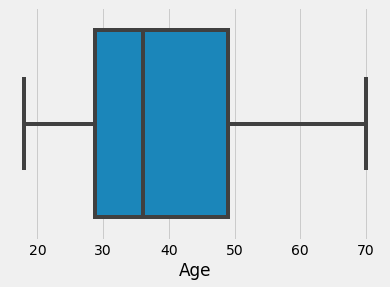

In [25]:
sns.boxplot(data.Age) #no outliers

## Checking the Categorical column and perform Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [30]:
data.Gender=le.fit_transform(data.Gender)

In [31]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Perform clustering algorithm

In [32]:
from sklearn import cluster

In [33]:
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(data)
    error.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [34]:
error

[975512.0599999999,
 387065.71377137717,
 271384.508782868,
 195401.19855991466,
 157157.7579059829,
 122625.1981355388,
 103233.01724386725,
 86053.67444777445,
 76938.97565600359,
 69231.3360761156]

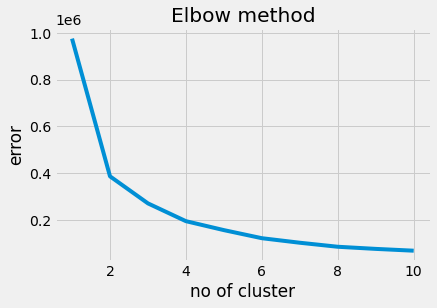

In [35]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of cluster')
plt.ylabel('error')
plt.show()


In [38]:
k_means_model=cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)
k_means_model.fit(data)


KMeans(n_clusters=3, random_state=0)

In [40]:

clustered_data =k_means_model.predict(data)

## Add the cluster data with the primary dataset

In [41]:
data['Clustered_data'] = pd.Series(clustered_data)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clustered_data
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


## Split the data into dependent and independent variables

In [43]:
y=data['Clustered_data']
y  
#target columns

0      0
1      0
2      0
3      0
4      0
      ..
195    2
196    2
197    2
198    2
199    2
Name: Clustered_data, Length: 200, dtype: int32

In [45]:
X=data.drop(columns=['Clustered_data'],axis=1)
X.head()
#x- predicting columns

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Scaling the Data

In [46]:
from sklearn.preprocessing import scale

## Split the data into training and testing

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.3,random_state=1)

In [49]:
X_train.shape,X_test.shape

((140, 5), (60, 5))

In [50]:
y_train.shape,y_test.shape

((140,), (60,))

## Build the model

In [ ]:
 from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)   
 K - Nearest Neighbour model (KNN)

## Train the model 

In [52]:
pred_train = model.predict(X_train)
pred_train

array([1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1,
       1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 2,
       0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2, 1, 2, 1, 0, 0, 2,
       1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 0, 1,
       0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 1, 2, 2, 1, 2, 0])

# Test the data

In [53]:
y_test

58     0
40     0
34     0
102    1
184    2
198    2
95     1
4      0
29     0
168    2
171    2
18     0
11     0
89     1
110    1
118    1
159    2
35     0
136    2
59     0
51     0
16     0
44     0
94     1
31     0
162    2
38     0
28     0
193    2
27     0
47     0
165    2
194    2
177    2
176    2
97     1
174    2
73     1
69     1
172    2
108    1
107    1
189    2
14     0
56     0
19     0
114    1
39     0
185    2
124    1
98     1
123    1
119    1
53     0
33     0
179    2
181    2
106    1
199    2
138    2
Name: Clustered_data, dtype: int32

In [54]:
pred_test=model.predict(X_test)
pred_test

array([0, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 0, 2, 1, 1, 0,
       0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 0,
       0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 2])

In [55]:
pred = pd.DataFrame({'Actual_value':y_test,'Predicted_value_using_KNN':pred_test})
pred.head()

,Actual_value,Predicted_value_using_KNN
58,0,0
40,0,1
34,0,0
102,1,1
184,2,2


## Measure the performance using metrics

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#Accuracy Score
print('Training accuracy: ',accuracy_score(y_train,pred_train))
print('Testing accuracy: ',accuracy_score(y_test,pred_test))

Training accuracy:  0.9214285714285714
Testing accuracy:  0.9166666666666666


In [57]:
#Confusion Matrix
pd.crosstab(y_test,pred_test)

col_0,0,1,2
Clustered_data,,,
0,19,4,0
1,1,16,0
2,0,0,20


In [58]:
#Classification Report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.80      0.94      0.86        17
           2       1.00      1.00      1.00        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60

